# Telecom Churn Prediction

#### Introduction
Welcome to the case study module on Telecom Churn Prediction!

 

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

#### Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 Recommend strategies to manage customer churn based on your observations.

 

Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model. 

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. 

 

# Steps
In the competition link, check the Code tab for the Starter Notebook that you can use as a reference for this entire case study. Some of the steps that you can use are as follows:

#### Data Understanding, Preparation, and Pre-Processing :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
#### Exploratory Data Analysis :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
#### Feature Engineering and Variable Transformation :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
#### Model Selection, Model Building, and  Prediction :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

## 1. Importing Dependencies, Data Loading and Understanding 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, auc,roc_auc_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [3]:
#importing train and test data
train_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\train.csv')
test_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\test.csv')

In [4]:
y_test_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\solution.csv')
y_test=y_test_df['churn_probability']

In [5]:
train_df.shape, test_df.shape

((69999, 172), (30000, 171))

In [6]:
y_train=train_df['churn_probability']
train_df=train_df.drop(['churn_probability'], axis=1)

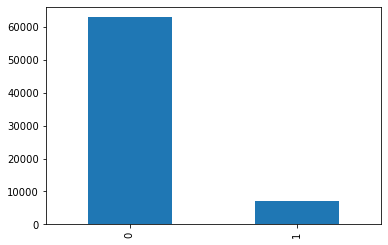

In [7]:
y_train.value_counts().plot.bar()
plt.show()

In [8]:
print('Churn percentage in training data is: ',round(100*y_train.value_counts()[1]/y_train.shape[0],2),'%')

Churn percentage in training data is:  10.19 %


In [9]:
tel_data=pd.concat([train_df,test_df],axis=0)

In [10]:
tel_data.shape

(99999, 171)

In [11]:
tel_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.

In [12]:
#Lets divide data into categorical and numeric time, thereafter we will check data in detail
#Numeric columns
num_col=list(tel_data.select_dtypes(['float64','int64','float32','int32']).columns)
len(num_col)

162

In [13]:
tel_data[num_col].head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,

In [14]:
#Categorical columns
cat_col=list(tel_data.select_dtypes(['object']).columns)
len(cat_col)

9

In [15]:
tel_data[cat_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


All the columns with date are with data type as object

## 2. Data Cleaning & Data Visulization

#### 2.1 Missing value Columns

In [16]:
#Lets check missing value columns
pd.DataFrame(round(100* tel_data.isnull().sum()/tel_data.shape[0],2), columns=['Null %'])

,Null %
id,0.00
circle_id,0.00
loc_og_t2o_mou,1.02
std_og_t2o_mou,1.02
loc_ic_t2o_mou,1.02
last_date_of_month_6,0.00
last_date_of_month_7,0.60
last_date_of_month_8,1.10
arpu_6,0.00
arpu_7,0.00


There are lot of columns with missing values more than 50%

Lets drop columns with missing vales greater than 50% and for numeric values with median values and dates with mode values

In [17]:
high_null_value_col=[]
for col in tel_data.columns:
    if (tel_data[col].isnull().sum()/tel_data.shape[0])>0.5:
        high_null_value_col.append(col)
len(high_null_value_col)  

30

In [18]:
#Lets remove these columns from num_col and cat_col
for col in high_null_value_col:
    if (tel_data[col].dtypes=='O'):
        cat_col.remove(col)
    else:
        num_col.remove(col)

In [19]:
#imputing numeric values
for col in tel_data.columns:
    if (tel_data[col].isnull().sum()/tel_data.shape[0])>0:
        #dropping columns with missing value more than 50%
        if (tel_data[col].isnull().sum()/tel_data.shape[0])>0.5:
            tel_data=tel_data.drop([col], axis=1)
            continue
            # imputing median value for numeric data tyoe
        elif (tel_data[col].dtypes=='int64') or (tel_data[col].dtypes=='float64'):
            tel_data[col]= tel_data[col].fillna(tel_data[col].median())
            continue

In order to treat missing values in dates. Lets check effect of null values in date_of_last_rech_7',date_of_last_rech_8',date_of_last_rech_6' on churn rate in training data. 

In [20]:
train_df['churn_probability']=y_train
Null_effect_on_churn=train_df[(train_df['date_of_last_rech_6'].isnull()==True) |\
                              (train_df['date_of_last_rech_7'].isnull()==True) |\
                              (train_df['date_of_last_rech_8'].isnull()==True)]
Null_effect_on_churn.shape

(4054, 172)

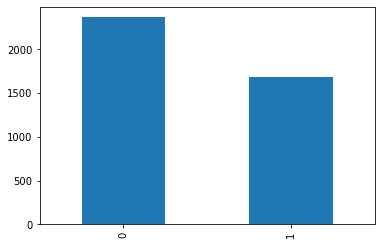

In [21]:
Null_effect_on_churn['churn_probability'].value_counts().plot.bar()
plt.show()

In [22]:
print("Churn percentage in training data in case of null values in variables is 'date_of_last_rech_6',\
'date_of_last_rech_7','date_of_last_rech_8' is: ",round(100*Null_effect_on_churn['churn_probability']\
                                                .value_counts()[1]/Null_effect_on_churn.shape[0],2),'%')

Churn percentage in training data in case of null values in variables is 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' is:  41.61 %


- Total churn rate in training data is 10.19 %, however as seen above churn rate is very high i.e. 41.61% among cases where there are null values in variables`'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'`, indicating in these cases there was no rechare done in these months.
- `date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8` were not considered for this purpose as upon there introduction churn rate was around 11% which is almost same as total churn rate in train data. Thus it was not impacting data much hence those variables has been dropped.

In [23]:
#imputing first date of respective month i.e starting date of dataframe in 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' 
#as we will be create new features with days since last recharge for all the variables

In [24]:
tel_data['date_of_last_rech_6'].fillna(value='6/1/2014', inplace=True)
tel_data['date_of_last_rech_7'].fillna(value='7/1/2014', inplace=True)
tel_data['date_of_last_rech_8'].fillna(value='8/1/2014', inplace=True)
tel_data['last_date_of_month_7'].fillna(tel_data['last_date_of_month_7'].value_counts().index[0], inplace=True)
tel_data['last_date_of_month_8'].fillna(tel_data['last_date_of_month_8'].value_counts().index[0], inplace=True)

In [25]:
tel_data.isnull().sum().sum()

0

In [26]:
len(num_col)+len(cat_col)==tel_data.shape[1]

True

In [27]:
#Lets remove 'id' from num_col and data
num_col.remove('id')
tel_data=tel_data.drop(['id'], axis=1)

#### 2.2 Unique value columns

In [28]:
#Lets drop columns with only single unique value as these columns adds on information to model.
single_Unique_value_col=[]
for col in tel_data.columns:
    if len(tel_data[col].unique())==1:
        single_Unique_value_col.append(col)
print(single_Unique_value_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [29]:
#Lets check values in these columsn
for i in single_Unique_value_col:
    print(tel_data[i].value_counts())

109    99999
Name: circle_id, dtype: int64
0.0    99999
Name: loc_og_t2o_mou, dtype: int64
0.0    99999
Name: std_og_t2o_mou, dtype: int64
0.0    99999
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99999
Name: last_date_of_month_7, dtype: int64
8/31/2014    99999
Name: last_date_of_month_8, dtype: int64
0.0    99999
Name: std_og_t2c_mou_6, dtype: int64
0.0    99999
Name: std_og_t2c_mou_7, dtype: int64
0.0    99999
Name: std_og_t2c_mou_8, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_6, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_7, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_8, dtype: int64


We will remove all variables except 'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'. Will remove variables later on

In [30]:
for i in ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']:
    single_Unique_value_col.remove(i)
tel_data=tel_data.drop(single_Unique_value_col, axis=1)

All the varaibles were alo checked for before imputing missing values and it was seen maximun varaibles were having single value in them thus not adding any information.

In [31]:
for col in single_Unique_value_col:
    if col in num_col:
        num_col.remove(col)
    else:
        cat_col.remove(col)

In [32]:
len(num_col)+len(cat_col)==tel_data.shape[1]

True

In [33]:
tel_data.shape

(99999, 130)

####  2.2 Outliers treatment

In [34]:
#Lets check no. of outliers
Outlier_data={}
for col in num_col:
    Q1= tel_data[col].quantile(0.25)
    Q2= tel_data[col].quantile(0.75)
    IQR=Q2-Q1
    outliers=tel_data[(tel_data[col]<=(Q1-1.5*IQR)) |(tel_data[col]>=(Q2+1.5*IQR))]
    Outlier_data[col]=round(100*outliers.shape[0]/tel_data.shape[0],2)
    
Outlier_per =pd.DataFrame([Outlier_data]).T
Outlier_per.columns=['Outlier%']
Outlier_per[Outlier_per['Outlier%']>0]

,Outlier%
arpu_6,5.75
arpu_7,5.79
arpu_8,5.59
onnet_mou_6,12.26
onnet_mou_7,12.63
onnet_mou_8,12.67
offnet_mou_6,8.89
offnet_mou_7,9.25
offnet_mou_8,9.44
roam_ic_mou_6,100.00


We will not drop outliers as although statistically there are outliers but as per business these values may not be unexpected and thus cannot be called outliers by removing these datapoints we may lose important information. Therfore we will not remove these outliers 

### 3. Data Visualization:

#### 3.1 Univariate Analysis

%%time
plt.subplots(figsize=[15,250])
k=1
for col in num_col:
    plt.subplot(int(len(num_col)/2)+1,4,k)
    sns.distplot(tel_data[col])
    k=k+1

As seen above maximum variables are having values close to zero.

In [35]:
#plt.figure(figsize=(10,40))
#sns.boxplot(x='value',y='variable', data=pd.melt(tel_data[num_col]))
#plt.show()

#### 2.2 Bivariate Analysis:

#Variation of features with churning
plt.subplots(figsize=[20,300])
k=1
for col in num_col:
    plt.subplot(int(len(num_col)/2)+1,4,k)
    sns.barplot(data=train_df, x='churn_probability', y=col)
    k=k+1

As seen above there are many features which are having higher values for churn cases compared to non churn cases.

plt.figure(figsize=(40,40))
sns.heatmap(tel_data[num_col].corr(), annot=True, cmap="YlGnBu")
plt.show()

As seen in the heatmap there are multiple columns with high correlation.

In [36]:
#Lets check variables with high correlation
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Absolute Correlations")
#displyaing top 30 best correlated pairs
print(get_top_abs_correlations(tel_data[num_col], 30))


Top Absolute Correlations
arpu_8            total_rech_amt_8    0.955952
arpu_6            total_rech_amt_6    0.953017
arpu_7            total_rech_amt_7    0.951995
isd_og_mou_7      isd_og_mou_8        0.931492
isd_og_mou_6      isd_og_mou_7        0.912532
                  isd_og_mou_8        0.906227
loc_ic_mou_6      total_ic_mou_6      0.900520
loc_ic_mou_8      total_ic_mou_8      0.889419
loc_ic_mou_7      total_ic_mou_7      0.889352
onnet_mou_8       std_og_t2t_mou_8    0.865969
onnet_mou_7       std_og_t2t_mou_7    0.859510
std_og_mou_8      total_og_mou_8      0.859191
offnet_mou_8      std_og_t2m_mou_8    0.855728
std_og_mou_7      total_og_mou_7      0.855199
std_ic_t2m_mou_8  std_ic_mou_8        0.855070
onnet_mou_6       std_og_t2t_mou_6    0.854038
offnet_mou_7      std_og_t2m_mou_7    0.853607
std_ic_t2m_mou_7  std_ic_mou_7        0.851653
std_ic_t2m_mou_6  std_ic_mou_6        0.845302
std_og_mou_6      total_og_mou_6      0.839788
offnet_mou_6      std_og_t2m_mou_6

As of now we are not going to drop any of the variables because by removing any variables we might lose some of the information. We will correlated variables during modelling.

#### 2.3 Feature Engineering

We will drive new features based on given variables

In [37]:
tel_data[cat_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014


In [38]:
tel_data[cat_col] = tel_data[cat_col].apply(pd.to_datetime)

Our data is of period June 2014 to August 2014. We can create variables with no. of days since last recharge in each of the month from last day of month.

In [39]:
#Lets create seperate features for no. of days since last recharge 
tel_data['days_since_last_rech_6']= (tel_data['last_date_of_month_6']- tel_data['date_of_last_rech_6']).dt.days
tel_data['days_since_last_rech_7']= (tel_data['last_date_of_month_7']- tel_data['date_of_last_rech_7']).dt.days
tel_data['days_since_last_rech_8']= (tel_data['last_date_of_month_8']- tel_data['date_of_last_rech_8']).dt.days

In [40]:
tel_data=tel_data.drop(cat_col, axis=1)

# 4. Data Preperation

#### 4.1  Filter high-value customers:
As mentioned, we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount.

In [41]:
#High Value Customer Extraction
#lets extract high value customers based on the average recharge amount
y_test_train=pd.concat([y_train,y_test], axis=0)
tel_data['Churn']=y_test_train
tel_data_hv=tel_data[tel_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].\
               mean(axis=1)> tel_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(axis=1).quantile(0.7)]
tel_data.drop(['Churn'], axis=1, inplace=True)

In [42]:
tel_data_hv.shape,tel_data.shape

((29998, 128), (99999, 127))

#### 4.2 Train Test Split for Model 1 i.e. for purpose of Interpretation

In [43]:
#Handling class imbalance using smote for Model 1

In [44]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_test_train==1))
print("counts of label '0':",sum(y_test_train==0))

counts of label '1': 10191
counts of label '0': 89808


In [45]:
#Defining X & Y
X_hv=tel_data_hv.drop(['Churn'], axis=1)
y_hv=tel_data_hv['Churn']

In [46]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train_hv, X_test_hv, y_train_hv, y_test_hv=train_test_split(X_hv,y_hv, random_state=42, train_size=0.7, stratify=y_hv)

As seen above there is high class imbalance

#### Imbalanced Classes

The problem we are trying to solve is a Classification Problem: we are trying to take each customer and classify them into either the Non-Churn Class (denoted as a 0) or the Churn Class (denoted as a 1).

Whenever we have a classification problem, it is important to note how frequently we observe each class in the dataset. In our case, we have significantly more Non-Churn cases than we do Churn Cases, as we’d hope would be the case for any business.

Noting class imbalances is important for evaluating modeling accuracy results.

For example, if I told you the model I built classifies 84% of cases correctly, that might seem pretty good. But in this case, Non-Churn cases represent 84% of the data, so, in theory, the model could just classify everything as Non-Churn and achieve an 84% accuracy score.

Therefore, when are evaluating model performance with an imbalanced dataset, we want to judge the model based mainly on how it performs on the minority class.

##### Recall
A Churn class Recall of 0.91 means that the model was able to catch 91% of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.

##### Precision
Precision of the Churn class measures how often the model catches an actual Churn case, while also factoring in how often it misclassifies a Non-Churn case as a Churn case. In this case, a Churn Precision of 0.84 is not a problem because there are no significant consequences of identifying a customer as a Churn risk when they are not.

In [47]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train_hv, y_train_hv)

In [49]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19702
counts of label '0': 19702


As seen above now there is no class imbalance.

In [50]:
X_train_hv.shape, y_train_hv.shape

((20998, 127), (20998,))

In [51]:
X_train_smo.shape, y_train_smo.shape

((39404, 127), (39404,))

####  4.3 Defining X, y for Model 2 for submission in Kaggle

As data is already split in train and test in Kaggle, therefore train_test_splt id not performed.

In [52]:
X_train=tel_data.iloc[0:69999 ,]
X_test=tel_data.iloc[69999:,]

In [53]:
X_train.shape, X_test.shape

((69999, 127), (30000, 127))

#### 4.4 Scaling of Data

##### 4.4.1 For Model 1

In [54]:
#scaler object
scaler=MinMaxScaler()
#Fit and transform in scaler objcet
X_train_smo[X_train_smo.columns]=scaler.fit_transform(X_train_smo[X_train_smo.columns])
#transforming test data
X_test_hv[X_test_hv.columns]=scaler.transform(X_test_hv[X_test_hv.columns])

##### 4.4.2 For Model 2

In [55]:
#scaler object
scaler=MinMaxScaler()
#Fit and transform in scaler objcet
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
#transforming test data
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

# 5. Model Development-Validation and Evaluation

We will be creating two spearate models for follwing purposes:
1. To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc. and for this purpose best model is Logistic Regression ehich can be used to explain the result for all the customers.
2. To predict highest acuuracy as overall accuracy is primary evaluation metric in Kaggle.

#### 5.1 Model 1 with Logistic Regression for High value customer

In [56]:
%%time
lr=LogisticRegression()
folds = 2
lr.fit(X_train_smo, y_train_smo)
rfe=RFE(lr)
#As we don't want model to be complex checking behaviour of model upto 40 features
hyper_params=[{'n_features_to_select':[15,25,35,45]}] 
cv_model=GridSearchCV(estimator=rfe,
                      param_grid=hyper_params,
                      scoring="accuracy",
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
cv_model.fit(X_train_smo, y_train_smo)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Wall time: 5min 58s


GridSearchCV(cv=2, estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [15, 25, 35, 45]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [57]:
cv_resuls=pd.DataFrame(cv_model.cv_results_)
cv_model.best_params_

{'n_features_to_select': 45}

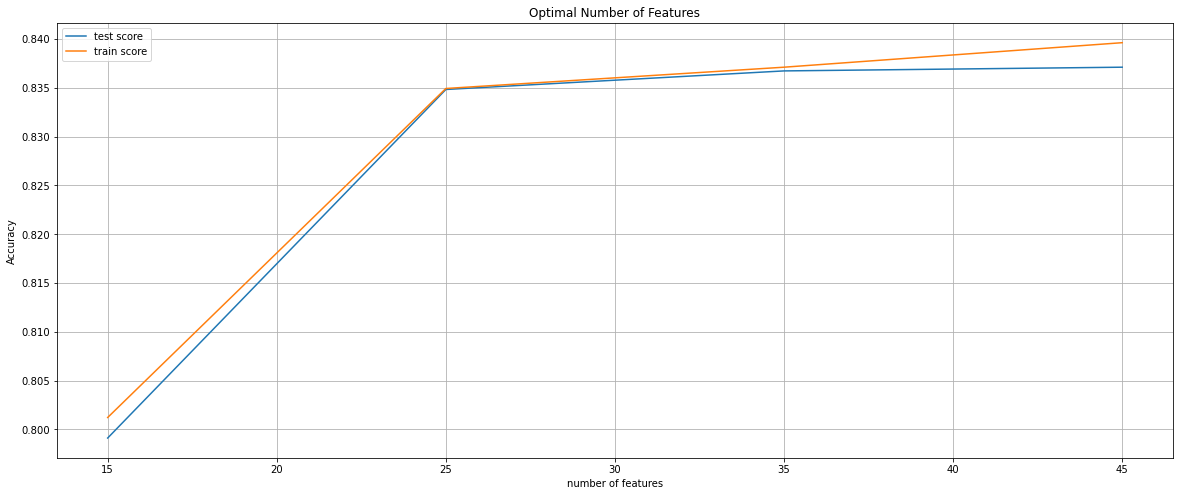

In [58]:
#lets plot mean test and train score to calculate ideal no. of features
cv_plot = cv_resuls
plt.figure(figsize=(20,8))
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_test_score"])
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('Accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.grid()
plt.show()

In [99]:
#lets implement RFE to reduce features
# define the method
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=35)
# fit the model
rfe.fit(X_train_smo, y_train_smo)

RFE(estimator=LogisticRegression(), n_features_to_select=35)

In [100]:
col=X_train_smo.columns[rfe.support_]

In [101]:
#                                Predicted
#                           Not Churn     Churn
#Actual Not churn              TN           FP 
#Actual Churn                  FN           TP 

In [102]:
def Metrics(X,y,classifier, model):
    metrics={}
    y_pred=classifier.predict(X)
    cm=confusion_matrix(y,y_pred)
    TP=cm[1,1]
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    Acc=100*round((TP+TN)/(TP+TN+FP+FN),4)
    Sen=100*round((TP)/(TP+FN),4)
    spec=100*round((TN)/(TN+FP),4)
    prec=100*round((TP)/(TP+FP),4)
    reca=100*round((TP)/(TP+FN),4)
    TPR=100*round((TP)/(TP+FN),4)
    FPR=100*round((FP)/(TN+FP),4)
    return {'Model':model,'Accuracy':Acc,'Sensitivity':Sen,'Specificity':spec,'Precision':prec,'Recall':reca,\
            'True Positive rate':TPR,'False Positive rate':FPR}

In [103]:
logreg=LogisticRegression()
logreg.fit(X_train_smo[col], y_train_smo)

LogisticRegression()

In [104]:
metrics= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics=metrics.append(Metrics(X_train_smo[col], y_train_smo,logreg, 'Logistic Regression train'),ignore_index=True)
metrics=metrics.append(Metrics(X_test_hv[col], y_test_hv,logreg, 'Logistic Regression test'),ignore_index=True)
metrics.set_index("Model", inplace=True)
metrics

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Logistic Regression train,84.14,84.89,83.39,83.64,84.89,84.89,16.61
Logistic Regression test,83.34,80.18,83.55,24.26,80.18,80.18,16.45


In [105]:
#For features = 50
#Logistic Regression train	84.30	84.80	83.81	83.97	84.80	84.80	16.19
#Logistic Regression test	83.76	80.36	83.98	24.79	80.36	80.36	16.02

In [106]:
#For features = 45
#Logistic Regression train	84.19	84.87	83.51	83.73	84.87	84.87	16.49
#Logistic Regression test	83.87	80.36	84.10	24.93	80.36	80.36	15.90

In [107]:
#For features = 40
#Logistic Regression train	84.33	85.18	83.48	83.76	85.18	85.18	16.52
#Logistic Regression test	83.38	80.36	83.58	24.33	80.36	80.36	16.42

In [108]:
#For features = 35
#Logistic Regression train	84.24	85.24	83.24	83.56	85.24	85.24	16.76
#Logistic Regression test	83.31	80.18	83.52	24.22	80.18	80.18	16.48

In [109]:
#For features = 30
#Logistic Regression train	84.01	84.85	83.16	83.44	84.85	84.85	16.84
#Logistic Regression test	83.27	80.18	83.47	24.17	80.18	80.18	16.53

As seen above model performance for features =30,35,40,45,50, there is not much difference between the final performances, therefore n=35 has been considered as test score is not improving much after that as seen in plot above also.

In [110]:
#Lets check p value and VIF for model
#Defining function for model and VIF
def Stats_Model(X,y):
    # add constant to X_train
    global X_train_sm
    X_train_sm= sm.add_constant(X)
    global lr
    lr=sm.GLM(y,X_train_sm, family=sm.families.Binomial())
    Linear_model=lr.fit()
    return Linear_model.summary()

def VIF(X):
    VIF=pd.DataFrame({"Features":X.columns})
    VIF["vif"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF["vif"] =round(VIF["vif"],2)
    VIF=VIF.sort_values(by="vif", ascending =False)
    return VIF

In [111]:
print(Stats_Model(X_train_smo[col], y_train_smo))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39368
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15158.
Date:                Mon, 11 Jul 2022   Deviance:                       30317.
Time:                        18:44:34   Pearson chi2:                 5.28e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [112]:
# Dropping total_rech_amt_7 due to high p value
col=list(col)
col.remove('total_rech_amt_7')
print(Stats_Model(X_train_smo[col], y_train_smo))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39369
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Mon, 11 Jul 2022   Deviance:                       30317.
Time:                        18:45:39   Pearson chi2:                 4.96e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [113]:
# Dropping loc_ic_mou_8 due to high p value
col.remove('loc_ic_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39370
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15159.
Date:                Mon, 11 Jul 2022   Deviance:                       30318.
Time:                        18:46:16   Pearson chi2:                 4.63e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [114]:
#Now that all the varaibles are significant Checking VIF value
VIF(X_train_smo[col])

,Features,vif
14,loc_ic_mou_7,9.23
10,loc_ic_t2m_mou_7,8.83
0,arpu_7,7.49
16,total_ic_mou_8,7.29
11,loc_ic_t2m_mou_8,6.95
6,loc_og_mou_8,4.90
4,loc_og_t2m_mou_8,4.42
9,total_og_mou_8,3.94
19,total_rech_amt_6,3.60
23,vol_3g_mb_6,3.24


In [115]:
# dropping loc_ic_mou_7 due to high VIF
col.remove('loc_ic_mou_7')
print(Stats_Model(X_train_smo[col], y_train_smo))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39371
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15214.
Date:                Mon, 11 Jul 2022   Deviance:                       30427.
Time:                        18:48:31   Pearson chi2:                 1.03e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [116]:
# dropping loc_og_mou_8 due to high p value
col.remove('loc_og_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39372
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15214.
Date:                Mon, 11 Jul 2022   Deviance:                       30427.
Time:                        18:49:01   Pearson chi2:                 1.20e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [117]:
# dropping arpu_7 due to high VIF
col.remove('arpu_7')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39373
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15250.
Date:                Mon, 11 Jul 2022   Deviance:                       30500.
Time:                        18:49:32   Pearson chi2:                 1.35e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [118]:
# dropping loc_ic_t2m_mou_8   due to high VIF
col.remove('loc_ic_t2m_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39374
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15267.
Date:                Mon, 11 Jul 2022   Deviance:                       30534.
Time:                        18:50:01   Pearson chi2:                 9.65e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#Avove model is acceptable as model is having p values less than 5% and  VIF less than 5%.

In [119]:
#Logistics regression on these features
logreg.fit(X_train_smo[col], y_train_smo)
y_train_pred_hv=logreg.predict(X_train_smo[col])

In [120]:
metrics= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics=metrics.append(Metrics(X_train_smo[col], y_train_smo,logreg, 'Logistic Regression train'),ignore_index=True)
metrics=metrics.append(Metrics(X_test_hv[col], y_test_hv,logreg, 'Logistic Regression test'),ignore_index=True)
metrics.set_index("Model", inplace=True)
metrics

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Logistic Regression train,83.99,84.53,83.45,83.63,84.53,84.53,16.55
Logistic Regression test,83.31,79.10,83.59,24.05,79.10,79.10,16.41


There is not much drop in accuracy of model for train and test model even after dropping  multiple features due to high VIF and p value.

As in instant case we are interested in Sensitivity recall score, lets create model with optimum probabilities.

In [121]:
#Predicted_churn_probability
y_train_pred_proba=logreg.predict_proba(X_train_smo[col])[:,1]

In [122]:
Prediction =pd.DataFrame({"Actual_Churn":y_train_smo, "Predicted_churn_probability":y_train_pred_proba})
Prediction.head()

,Actual_Churn,Predicted_churn_probability
0,0,0.917652
1,0,0.274734
2,0,0.045256
3,0,0.005543
4,0,0.045464


#### Finding Optimal Cutoff Point

In [123]:
#Optimal cutoof point is tradeoff between sensitivity and specificity.
probabilities =[float(i/10) for i in range(10)]
probabilities

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [124]:
for i in probabilities:
    Prediction[i]= Prediction["Predicted_churn_probability"].map(lambda x : 1 if x>i else 0)
Prediction.head()

,Actual_Churn,Predicted_churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.917652,1,1,1,1,1,1,1,1,1,1
1,0,0.274734,1,1,1,0,0,0,0,0,0,0
2,0,0.045256,1,0,0,0,0,0,0,0,0,0
3,0,0.005543,1,0,0,0,0,0,0,0,0,0
4,0,0.045464,1,0,0,0,0,0,0,0,0,0


In [125]:
Metrics_df= pd.DataFrame(columns=['prob','Sensitivity','Specificity','Accuracy','recall', 'Precision'])
prob=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob:
    cm = confusion_matrix(Prediction.Actual_Churn,Prediction[i])
    TP=cm[1,1]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[0,0]
    Sensitivity= (TP/(TP+FN))
    Specificity= (TN/(TN+FP))
    Accuracy= ((TN+TP)/(TN+FP+FN+TP))
    recall=Sensitivity
    Precision=(TP/(TP+FP))
    
    Metrics_df.loc[i] =[ i ,Sensitivity,Specificity,Accuracy, recall, Precision]
Metrics_df

,prob,Sensitivity,Specificity,Accuracy,recall,Precision
0.0,0.0,1.000000,0.000000,0.500000,1.000000,0.500000
0.1,0.1,0.987666,0.330728,0.659197,0.987666,0.596079
0.2,0.2,0.967719,0.485484,0.726601,0.967719,0.652878
0.3,0.3,0.939600,0.617704,0.778652,0.939600,0.710797
0.4,0.4,0.896356,0.733225,0.814790,0.896356,0.770641
0.5,0.5,0.845295,0.834484,0.839889,0.845295,0.836254
0.6,0.6,0.769770,0.898183,0.833976,0.769770,0.883182
0.7,0.7,0.659730,0.937367,0.798548,0.659730,0.913294
0.8,0.8,0.487818,0.965029,0.726424,0.487818,0.933107
0.9,0.9,0.272307,0.984621,0.628464,0.272307,0.946542


##### Recall Precision tradeoff

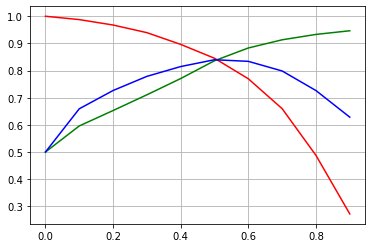

In [128]:
plt.plot(Metrics_df.prob,Metrics_df.recall, color='r')
plt.plot(Metrics_df.prob,Metrics_df.Precision, color='g')
plt.plot(Metrics_df.prob,Metrics_df.Accuracy, color='b')
plt.grid()
plt.show()

###### Sensitivity Specificity tradeoff

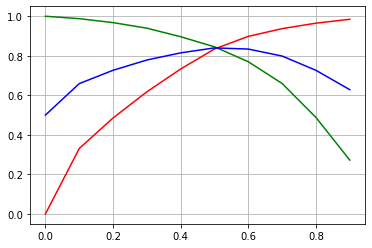

In [129]:
plt.plot(Metrics_df.prob,Metrics_df.Specificity, color='r')
plt.plot(Metrics_df.prob,Metrics_df.Sensitivity, color='g')
plt.plot(Metrics_df.prob,Metrics_df.Accuracy, color='b')
plt.grid()
plt.show()

As seen above Recall-Precisison , Specificity and sensitivity trade off curves are both indicating optimum probability as 0.5, therefore no change is required in optimum probability.

In [130]:
y_test_pred_proba=logreg.predict_proba(X_test_hv[col])

In [131]:
tpr,fpr,thres= roc_curve(y_test_hv,y_test_pred_proba[:,1],drop_intermediate =False)

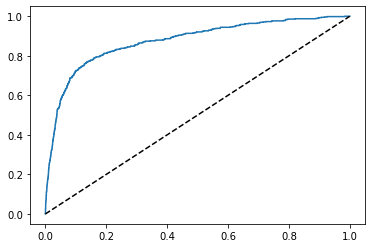

In [132]:
plt.plot(tpr,fpr)
plt.plot([0,1],[0,1],"k--")
plt.show()

In [133]:
area_under_curve= roc_auc_score(y_test_hv,logreg.predict(X_test_hv[col]))
round(area_under_curve,4)

0.8134

In [135]:
imp_feature=pd.DataFrame({'Features': X_test_hv[col].columns,'Coeff':logreg.coef_.reshape(-1)})
imp_feature=imp_feature.sort_values(by='Coeff',key=abs,  ascending =False)
imp_feature

,Features,Coeff
12,total_ic_mou_8,-15.630478
7,total_og_mou_8,-12.900722
24,sachet_2g_8,-11.257954
27,monthly_3g_8,-10.477346
16,last_day_rch_amt_8,-10.278543
3,loc_og_t2m_mou_8,-10.189718
23,monthly_2g_8,-8.979103
5,std_og_mou_7,8.038901
15,total_rech_amt_6,7.672018
2,roam_og_mou_8,7.013549


Thus important factors for predicting whether a customer is going to churn are:
- total_ic_mou_8: Total incoming minutes of usage in voice calls in August.
- total_og_mou_8: Total outgoing minutes of usage in voice calls in August.
- sachet_2g_8: Service schemes with validity smaller than a month for 2g in August.
- monthly_3g_8: Service schemes with validity equivalent to a month for 3G in August
- last_day_rch_amt_8:Last Day recharge amount for August.
- loc_og_t2m_mou_8: Minutes of usage in Outgoing Local voice calls within same telecom circle with different mobile operator in August.
- monthly_2g_8:Service schemes with validity equivalent to a month for 2G in August
- std_og_mou_7: Minutes of usage in STD outgoing voice calls outside the calling circle
- total_rech_amt_6: Total recharge amount in June
- roam_og_mou_8:Minutes of outgoing voice calls in roaming
- vol_3g_mb_7: Mobile internet usage 3G data volume in MB for 
- monthly_3g_6: Service schemes with validity equivalent to a month for 3G in June

#### 5.2 Model 2 Development without PCA for all the customers for submission on Kaggle

In [139]:
%%time
output= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
classifiers = {'Logistic Regression': LogisticRegression(),
                'KNN': KNeighborsClassifier(),
                'Decision Tree':DecisionTreeClassifier(),
                'Random Forest': RandomForestClassifier(),
                'Ada Boost':AdaBoostClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBoost':xgb.XGBClassifier()}
for model,classifier in classifiers.items():
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_smo, y_train_smo)
    output=output.append(Metrics(X_train_smo, y_train_smo,classifier,model),ignore_index=True)
output.set_index("Model", inplace=True)
output

Wall time: 3min 16s


,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Logistic Regression,84.34,84.85,83.82,83.98,84.85,84.85,16.18
KNN,92.91,99.86,85.95,87.67,99.86,99.86,14.05
Decision Tree,100.00,100.00,100.00,100.00,100.00,100.00,0.00
Random Forest,100.00,100.00,100.00,100.00,100.00,100.00,0.00
Ada Boost,92.67,93.20,92.14,92.23,93.20,93.20,7.86
GradientBoosting,94.37,94.84,93.89,93.95,94.84,94.84,6.11
XGBoost,99.95,99.94,99.96,99.96,99.94,99.94,0.04


#### 5.2 Model Development with PCA

In [140]:
pca=PCA()

In [141]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

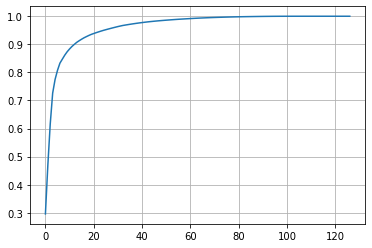

In [142]:
plt.plot(range(0,len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [174]:
# At around 60 features around 90% of variance in data is explained, thus using n=60
pca=PCA(n_components=60)

In [ ]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_pca.shape

In [ ]:
%%time
output_pca= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
classifiers = {'Logistic Regression': LogisticRegression(),
               'KNN': KNeighborsClassifier(),
                'Decision Tree':DecisionTreeClassifier(),
                'Random Forest': RandomForestClassifier(),
                'Ada Boost':AdaBoostClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBoost':xgb.XGBClassifier()}
for model,classifier in classifiers.items():
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_pca, y_train)
    output_pca=output_pca.append(Metrics(X_train_pca,y_train,classifier,model),ignore_index=True)
output_pca.set_index("Model", inplace=True)
output_pca

In [ ]:
%%time
output_pca= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
classifiers = {'Logistic Regression': LogisticRegression(),
               'KNN': KNeighborsClassifier(),
                'Decision Tree':DecisionTreeClassifier(),
                'Random Forest': RandomForestClassifier(),
                'Ada Boost':AdaBoostClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBoost':xgb.XGBClassifier()}
for model,classifier in classifiers.items():
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_pca, y_train)
    output_pca=output_pca.append(Metrics(X_test_pca,y_test,classifier,model),ignore_index=True)
output_pca.set_index("Model", inplace=True)
output_pca_test

In [ ]:
Logistic Regression	84.34	84.85	83.82	83.98	84.85	84.85	16.18
KNN	92.91	99.86	85.95	87.67	99.86	99.86	14.05
Decision Tree	100.00	100.00	100.00	100.00	100.00	100.00	0.00
Random Forest	100.00	100.00	100.00	100.00	100.00	100.00	0.00
Ada Boost	92.67	93.20	92.14	92.23	93.20	93.20	7.86
GradientBoosting	94.37	94.84	93.89	93.95	94.84	94.84	6.11
XGBoost	99.95	99.94	99.96	99.96	99.94	99.94	0.04

As seen above PCA is not helping much in increasing the Recall for the case even when 99% of variance is expained through PCA, may be because there is very less correlation among data or because of non linear data. Further, execution time with PCA is more compared with without PCA. Therefore we will continue with further treatment without PCA.

#### 5.3 Model Development with HyperParamter Tunning (HPT)

#### 5.3.1 Decision Tree Classifier  with HPT

Lets deploy  GridSearch CV with startifiedCV in order to tune Hyperparamters

In [146]:
# We will keep scoring as recall as want all the churn cases to be predicted accuartely.
#folds
cv=StratifiedKFold(n_splits=5,  shuffle=False, random_state=None)
params={'max_depth': [8,10,12],
       'min_samples_split':[8,10,12],
       'min_samples_leaf':[2,5,10]}
model_cv=GridSearchCV(estimator=DecisionTreeClassifier(),
                           scoring='accuracy',
                           param_grid=params,
                           cv=cv,
                           verbose=3,
                           n_jobs=-1)

In [147]:
%%time
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Wall time: 2min 12s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [8, 10, 12]},
             scoring='accuracy', verbose=3)

In [148]:
model_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [149]:
tree=model_cv.best_estimator_
tree.fit(X_train, y_train)
metrics_dt= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_dt=metrics_dt.append(Metrics(X_train, y_train,tree, 'Decision Tree'),ignore_index=True)
metrics_dt.set_index("Model", inplace=True)
metrics_dt

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Decision Tree,94.65,67.43,97.74,77.18,67.43,67.43,2.26


#### 5.3.2 RandomForestClassifier with HPT

In [150]:
# We will keep scoring as recall as want all the churn cases to be predicted accuartely.
#folds
cv=StratifiedKFold(n_splits=5,  shuffle=False, random_state=None)
params={'n_estimators':[200],#Actual values used [100,150]
        'max_depth': [15],#[8,10,12]
       'min_samples_split':[15],#[12,15,20]
       'min_samples_leaf':[2]}#[2,5,10]
model_cv=GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
                           scoring='accuracy',
                           param_grid=params,
                           cv=cv,
                           verbose=3,
                           n_jobs=-1)

In [151]:
%%time
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 3min 11s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [15], 'min_samples_leaf': [2],
                         'min_samples_split': [15], 'n_estimators': [200]},
             scoring='accuracy', verbose=3)

In [152]:
model_cv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 200}

In [153]:
rf=model_cv.best_estimator_
rf.fit(X_train, y_train)
metrics_rf= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_rf=metrics_rf.append(Metrics(X_train, y_train,rf, 'Random Forest'),ignore_index=True)
metrics_rf.set_index("Model", inplace=True)
metrics_rf

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Random Forest,95.77,69.17,98.79,86.67,69.17,69.17,1.21


In [154]:
rf.oob_score_

0.9420134573351048

#### 5.3.3 GradientBoostingClassifier with HPT

In [155]:
%%time
gb=GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,max_depth=10)
gb.fit(X_train, y_train)
metrics_gb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_gb=metrics_gb.append(Metrics(X_train, y_train,gb, 'Gradient Boosting'),ignore_index=True)
metrics_gb.set_index("Model", inplace=True)
metrics_gb

Wall time: 12min 11s


,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Gradient Boosting,99.82,98.58,99.96,99.62,98.58,98.58,0.04


#### 5.3.4 XGBoosting with HPT

In [156]:
%%time
xgboost=xgb.XGBClassifier(n_estimators=150,learning_rate=0.05,max_depth=10)
xgboost.fit(X_train, y_train)
metrics_xgb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])

Wall time: 55.3 s


In [157]:
metrics_xgb=metrics_xgb.append(Metrics(X_train, y_train,xgboost, 'XGBoosting'),ignore_index=True)
metrics_xgb.set_index("Model", inplace=True)
metrics_xgb

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
XGBoosting,98.26,91.77,99.0,91.22,91.77,91.77,1.0


In [158]:
%%time
xgboost=xgb.XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=10,reg_alpha=0.2,reg_lambda=0.2)
xgboost.fit(X_train, y_train)
metrics_xgb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_xgb=metrics_xgb.append(Metrics(X_train, y_train,xgboost, 'XGBoosting'),ignore_index=True)
metrics_xgb.set_index("Model", inplace=True)
metrics_xgb

Wall time: 1min 44s


,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
XGBoosting,99.99,100.0,99.99,99.93,100.0,100.0,0.01


In [159]:
final_metrics=pd.concat([metrics_dt,metrics_rf], axis=0)
final_metrics=pd.concat([final_metrics,metrics_gb], axis=0)
final_metrics=pd.concat([final_metrics,metrics_xgb], axis=0)
print('Metrics using various Models after HPT are as under: ')
final_metrics

Metrics using various Models after HPT are as under: 


,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Decision Tree,94.65,67.43,97.74,77.18,67.43,67.43,2.26
Random Forest,95.77,69.17,98.79,86.67,69.17,69.17,1.21
Gradient Boosting,99.82,98.58,99.96,99.62,98.58,98.58,0.04
XGBoosting,99.99,100.00,99.99,99.93,100.00,100.00,0.01


As seen from above best model is XGBoost so lets evaluate model with test data on XGBoost model.

In [164]:
metrics_xgb_test= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_xgb_test=metrics_xgb_test.append(Metrics(X_test, y_test,tree, 'Decision Tree Test'),ignore_index=True)
metrics_xgb_test=metrics_xgb_test.append(Metrics(X_test, y_test,rf, 'Random Forest Test'),ignore_index=True)
metrics_xgb_test=metrics_xgb_test.append(Metrics(X_test, y_test,gb, 'Gradiesnt Boosting Test'),ignore_index=True)
metrics_xgb_test=metrics_xgb_test.append(Metrics(X_test, y_test,xgboost, 'XGBoosting Test'),ignore_index=True)

metrics_xgb_test.set_index("Model", inplace=True)
metrics_xgb_test

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Decision Tree Test,94.01,64.66,97.35,73.45,64.66,64.66,2.65
Random Forest Test,94.46,61.69,98.18,79.39,61.69,61.69,1.82
Gradiesnt Boosting Test,94.21,65.77,97.44,74.44,65.77,65.77,2.56
XGBoosting Test,94.58,65.51,97.88,77.83,65.51,65.51,2.12


- Max Recall value on test data is around 65.77% which means model is able to correctly predict only 65.77% of actual churn cases.
- This model cannot be deployed for detecting churn customers in real world.
- However primary aim was to have higher accuary in prediction for overall data for submission in Kaggle.

## 6. Submission in Kaggle

In [161]:
y_test_pred=xgboost.predict(X_test)

In [162]:
#Submission in Kaggle
submission=pd.DataFrame({'id':test_df.id, 'churn_probability':y_test_pred})
submission=submission.set_index('id')
submission.head()

,churn_probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0


In [163]:
submission.to_csv('Submission2.csv')

## 7. Conclusion:

##### 7.1 Model 1: For interpretation

1. Maximum factors which are effecting churn are for month August.
2. Churn rate is high when Total incoming  and ougoing minutes for voice calls in August is lower. Thus if no of incoming and outgoing calls are decreasing for a particular customer there is high change he may be switching to another network.
3. Lower Service schemes with validity equivalent to a month for 3G in August also indicates higher probability of churn. If network condition in a place is good, customers will use data early thus there will more no. of recharges and thus less chances of churn, however if network is poor then data will not be consumed and thus no. of monthly recharges will be less, leading to churn. 
4. If incoming calls are high and outgoing calls are less then customer may be finding the services very costly and may switch to network where incoming and outgoing services are in less/reasonable according to him/her.

##### 7.2 Model 2: For purpose of accurate prediction 

Final Model for Submission is XGBoosting model with test accuracy of 94.58%.

- Created by- @Rohitcnith & @GiridharTarare